# Stack

In [54]:
from IPython.display import Image

## Implementation Details

In [30]:
'''
LIFO : Last-In First-Out

Data:
    - Space for storing elemets
    - top pointer
    
Operations:
    - push(element)
    - pop()
    - peek(index)
    - stackTop()
    - isEmpty()
    - isFull()
'''
print()

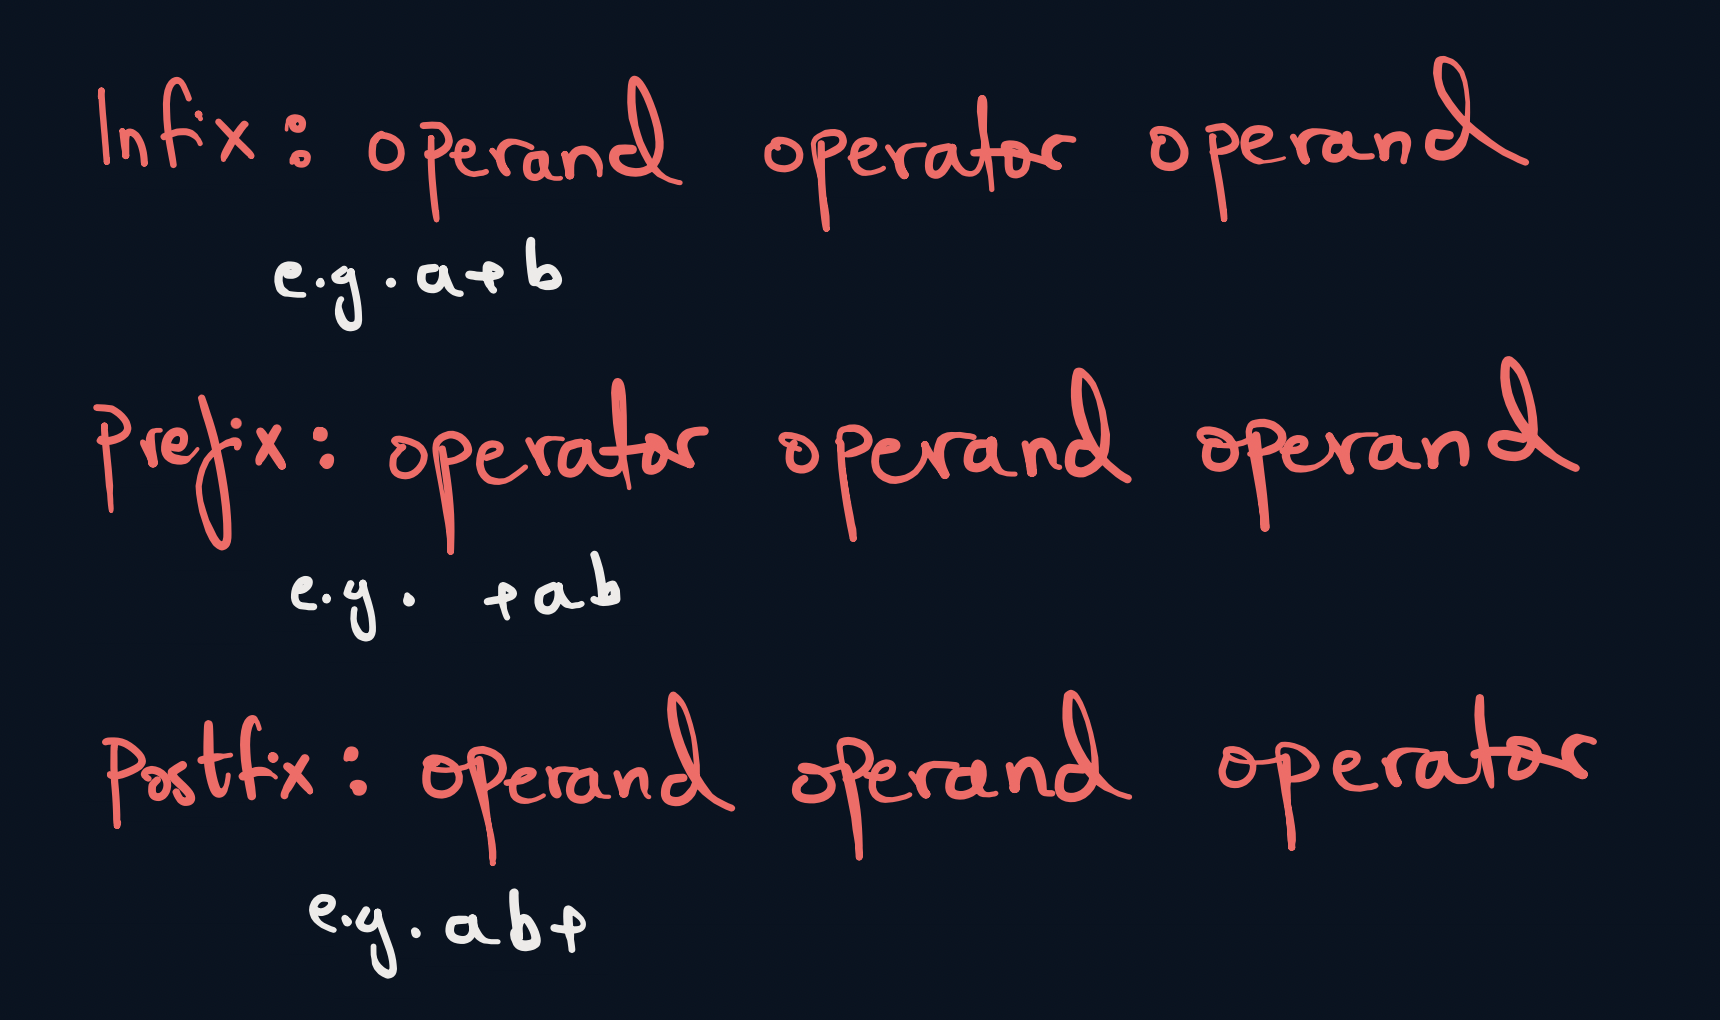

In [60]:
Image(filename='./resources/st1.png')

In [61]:
'''
The advantage of writing an expression in postfix form is that we can scan 
the expression only once and perform all the operations. 

In infix form it is not easy to evaluate in one single scan.
'''
print()

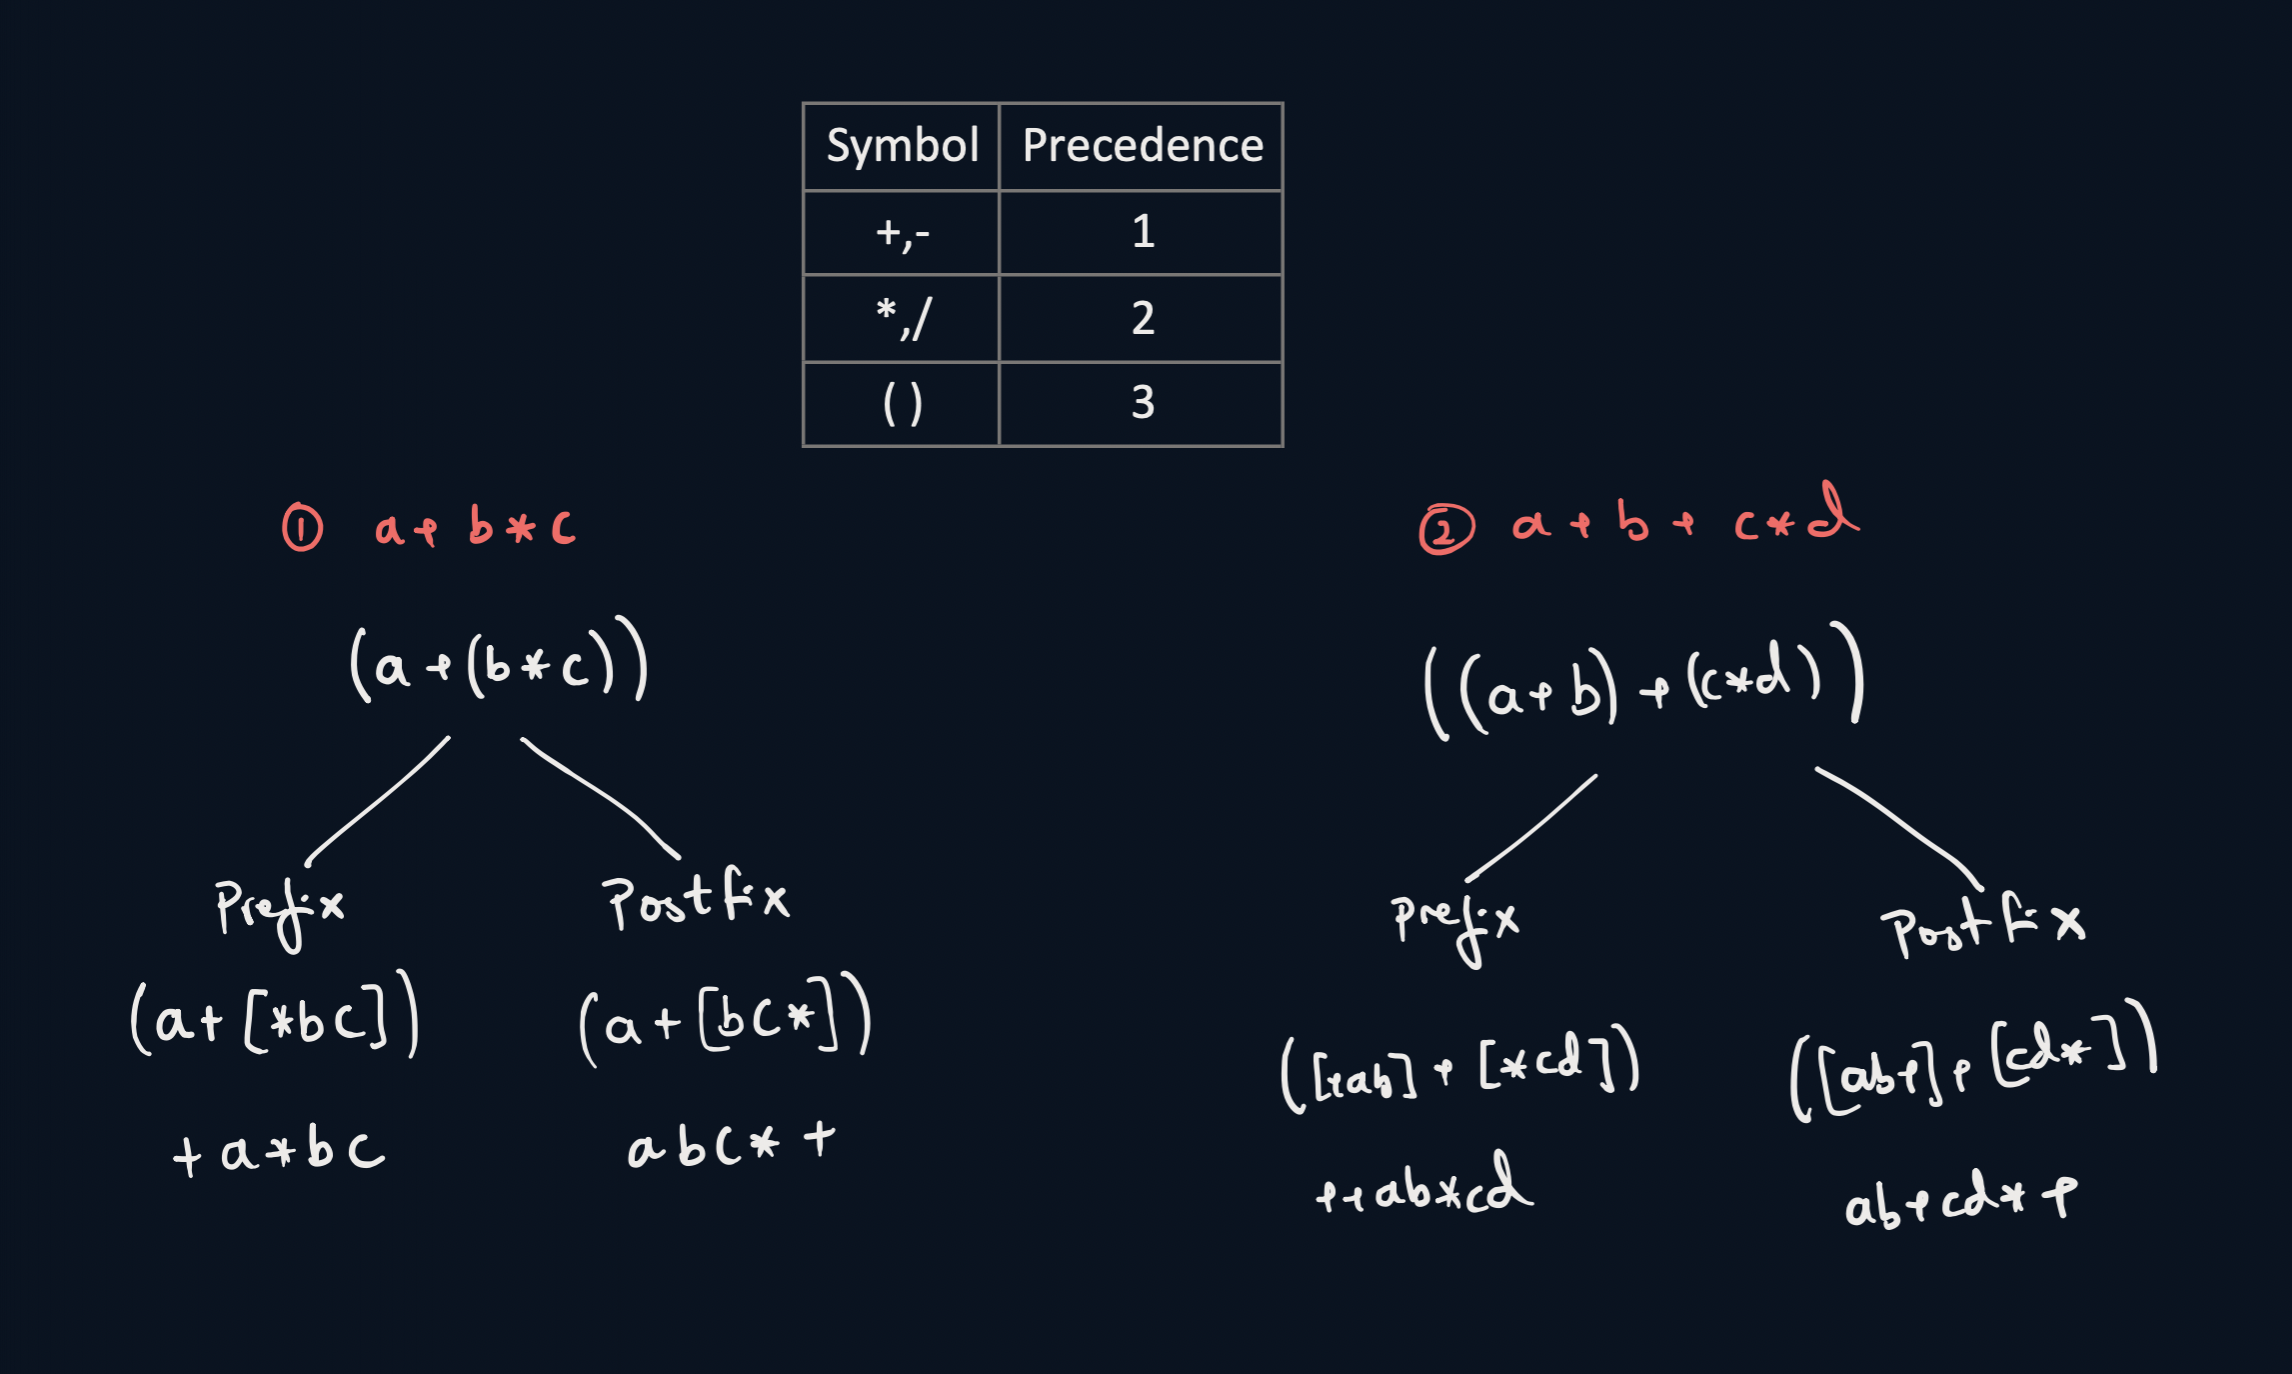

In [63]:
Image(filename='./resources/st2.png')

In [64]:
'''
symbol  precedence  Associativity

 +,-        1           L-R
 *,/        2           L-R
  ^         3           R-L
  -         4           R-L
 ( )        5           L-R
 
'''
print()

## Implementation

```C
#include <stdio.h>
#include <stdlib.h>

// Menu Driven Program for Stack Using Array

struct Stack{ // stack using array
    int capacity;
    int top;
    int* arr;
};

int isEmpty(struct Stack s){
    if(s.top == -1){
        return 1;
    }
    return 0;
}

int isFull(struct Stack s) {
    if(s.top == s.capacity-1){
        return 1;
    }
    return 0;
}

void  push(struct Stack* s, int element){ // O(1)
    if(!isFull(*s)){
        s->arr[++s->top] = element;
    }
}

int pop(struct Stack* s){ // O(1)
    if(!isEmpty(*s)){
        return s->arr[s->top--];
    }
    printf("Stack is Empty\n");
    return -1;
}

void peek(struct Stack s, int position){ // O(1)
    if(!isEmpty(s)){
        if(position >=1 && position <= s.top+1){
            printf("%d\n",s.arr[s.top-(position-1)]);
            return;
        }
        else printf("Invalid Position\n");
    }
    printf("Stack is Empty\n");
    
}

void stackTop(struct Stack s){
    if(!isEmpty(s)) printf("%d\n",s.arr[s.top]);
    else printf("Stack is Empty\n");
}

void display(struct Stack s){
    if(!isEmpty(s)){
        while(s.top != -1){
            printf("------\n");
            printf("|  %d  |\n",s.arr[s.top--]);
        }
        printf("------");
        printf("\n\n");
        return;
    }
    printf("\n\n");
    
}

int main() {

    struct Stack st;
    printf("Enter the capacity of the stack: ");
    scanf(" %d",&st.capacity);

    st.arr = (int*)malloc(st.capacity*sizeof(int));
    st.top = -1;

    int ch;
    int element, position;

    do {

        printf("Stack:\n");
        display(st);

        printf("\n\nMenu\n");
        printf("1. push\n");
        printf("2. pop\n");
        printf("3. peek\n");
        printf("4. stackTop\n");
        printf("5. Exit\n\n");

        printf("Enter your choice: ");
        scanf(" %d",&ch);
        
        switch(ch){
            case 1:
                printf("Enter a element to push to the stack: ");
                scanf(" %d",&element);
                push(&st,element);
                break;
            case 2:
                element = pop(&st);
                printf("%d\n",element);
                break;
            case 3:
                printf("Enter position: ");
                scanf(" %d",&position);
                peek(st,position);
                break;
            case 4:
                stackTop(st);
                break;
            case 5:
                printf("End of Program\n");
                return 0;
            default:
                printf("Invalid Option\n");
        }
        
        
    }while(ch != 5);



    return 0;
}
```

```C
#include <stdio.h>
#include <stdlib.h>

// Menu Driven Program for Stack Using Linked List

struct Node {
    int data;
    struct Node* next;
};

struct Node* top = NULL;

int isEmpty(){
    return top ? 0:1;
}

int isFull(){
    struct Node* new = (struct Node*)malloc(sizeof(struct Node));
    if(new == NULL) return 1;
    free(new);
    return 0;
}


void  push(int element){ // O(1)

    if(!isFull()){
        struct Node* new;
        new = (struct Node*)malloc(sizeof(struct Node));
        new->data = element;
        new->next = top;
        top = new;
    }
    else printf("Stack is Full");
    
}

int pop(){ // O(1)

    struct Node *temp;
    int element = -1;
    
    if(!isEmpty()){
        temp = top;
        element = temp->data;
        top=top->next;
        free(temp);
        return element;
    }
    printf("Stack is Empty\n");
    return element;
}

void peek(int position){ // O(n)
    struct Node* temp = top;
    if(!isEmpty()){
        for(int i=0;temp!=NULL && i<position-1;i++){
            temp = temp->next;
        }
        if(temp) printf("%d\n",temp->data);
        else printf("Invalid Index\n");
    }
    printf("Stack is Empty\n");
    
}

void stackTop(){
    if(!isEmpty()) printf("%d\n",top->data);
    else printf("Stack is Empty\n");
}

void display(){
    struct Node* temp = top;
    if(!isEmpty()){
        while(temp){
            printf("------\n");
            printf("|  %d  |\n",temp->data);
            temp = temp->next;
        }
        printf("------");
        printf("\n\n");
        return;
    }
    printf("Currently Empty\n");
    
}

int main() {


    int ch;
    int element, position;

    do {

        printf("Stack:\n");
        display();

        printf("\n\nMenu\n");
        printf("1. push\n");
        printf("2. pop\n");
        printf("3. peek\n");
        printf("4. stackTop\n");
        printf("5. Exit\n\n");

        printf("Enter your choice: ");
        scanf(" %d",&ch);
        
        switch(ch){
            case 1:
                printf("Enter a element to push to the stack: ");
                scanf(" %d",&element);
                push(element);
                break;
            case 2:
                element = pop();
                printf("%d\n",element);
                break;
            case 3:
                printf("Enter position: ");
                scanf(" %d",&position);
                peek(position);
                break;
            case 4:
                stackTop();
                break;
            case 5:
                printf("End of Program\n");
                return 0;
            default:
                printf("Invalid Option\n");
        }
        
        
    }while(ch != 5);



    return 0;
}
```

# Questions

```1. Parenthesis Matching```

```C
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <stdbool.h>

struct Stack{
    int capacity;
    int top;
    char* arr;
};

struct Stack st;

int isEmpty(struct Stack s){
    if(s.top == -1){
        return 1;
    }
    return 0;
}

int isFull(struct Stack s) {
    if(s.top == s.capacity-1){
        return 1;
    }
    return 0;
}

void  push(struct Stack* s, char element){ // O(1)
    if(!isFull(*s)){
        s->arr[++s->top] = element;
    }
}

char pop(struct Stack* s){ // O(1)
    if(!isEmpty(*s)){
        return s->arr[s->top--];
    }
    printf("Stack is Empty\n");
    return -1;
}

int isBalance(char *exp){

    st.capacity = strlen(exp);
    st.arr = (char*)malloc(st.capacity*sizeof(char));
    st.top = -1;

    for(int i=0;exp[i]!='\0';i++){
        if(exp[i]=='(') push(&st,exp[i]); // only push opening parenthesis
        else if(exp[i]==')'){
            if(!isEmpty(st)) pop(&st); // pop when we encounter closing parenthesis given stack isn't empty
            else return false;
        }
    }

    if(isEmpty(st)) return true; // at the end, is stack is empty the parenthesis are balanced
    return false;
}


int main() {

    char exp[] = "((a+b)*(c+d))";
    printf("%d\n",isBalance(exp));

    free(st.arr);

    return 0;
}
```

```2. Parenthesis Matching Extension```

```C
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <stdbool.h>

struct Stack{
    int capacity;
    int top;
    char* arr;
};

struct Stack st;

int isEmpty(struct Stack s){
    if(s.top == -1){
        return 1;
    }
    return 0;
}

int isFull(struct Stack s) {
    if(s.top == s.capacity-1){
        return 1;
    }
    return 0;
}

void  push(struct Stack* s, char element){ // O(1)
    if(!isFull(*s)){
        s->arr[++s->top] = element;
    }
}

char pop(struct Stack* s){ // O(1)
    if(!isEmpty(*s)){
        return s->arr[s->top--];
    }
    printf("Stack is Empty\n");
    return -1;
}

int isBalance(char *exp){

    st.capacity = strlen(exp);
    st.arr = (char*)malloc(st.capacity*sizeof(char));
    st.top = -1;

    for(int i=0;exp[i]!='\0';i++){
        
        if(exp[i]=='(' || exp[i]=='[' || exp[i]=='{') push(&st,exp[i]); 
        else if(exp[i]==')' || exp[i]==']' || exp[i]=='}'){
            
            if(!isEmpty(st)){

                if(exp[i]==')'){
                    if(pop(&st) != '(') return false;
                }
                else if(exp[i]==']'){ 
                    if(pop(&st) != '[') return false;
                }
                else if(exp[i]=='}'){
                    if(pop(&st) != '{') return false;
                }
            }
            else return false;
        }
    }

    if(isEmpty(st)) return true; 
    return false;
}


int main() {

    char exp[] = "[[{a+b}*(c+d)]]]";
    printf("%d\n",isBalance(exp));

    free(st.arr);

    return 0;
}
```

```3. Infix to Postfix```

```C
#include <stdio.h>
#include <stdlib.h>
#include <string.h>


struct Stack{ // stack using array
    int capacity;
    int top;
    char* arr;
};

struct Stack st;

int isEmpty(struct Stack s){
    if(s.top == -1){
        return 1;
    }
    return 0;
}

int isFull(struct Stack s) {
    if(s.top == s.capacity-1){
        return 1;
    }
    return 0;
}

void  push(struct Stack* s, char element){ // O(1)
    if(!isFull(*s)){
        s->arr[++s->top] = element;
    }
}

char pop(struct Stack* s){ // O(1)
    if(!isEmpty(*s)){
        return s->arr[s->top--];
    }
    printf("Stack is Empty\n");
    return -1;
}



char stackTop(struct Stack s){
    if(!isEmpty(s)) return s.arr[s.top];
    else return -1;
}


int isOperand(char x){
    if(x=='+' || x=='-' || x=='*' || x=='/')  return 0;
    return 1;
}

int precedence(char x){
    if(x == '+' || x == '-') return 1;
    else if(x == '*' || x == '/') return 2;
    return 0;
}

char* convert(char infix[]){

    st.capacity = strlen(infix);
    st.arr = (char*)malloc(st.capacity*sizeof(char));
    st.top = -1;

    char* postfix = (char*)malloc((strlen(infix)+1)*sizeof(char));

    int i =0,j=0;

    while(infix[i]!='\0'){
    
        if(isOperand(infix[i])) postfix[j++] = infix[i++];
        else {
            if( isEmpty(st) || (precedence(infix[i])>precedence(stackTop(st))) ) push(&st,infix[i++]);
            else postfix[j++] = pop(&st);
        }
    }

    while(!isEmpty(st)){
        postfix[j++] = pop(&st);
    }

    postfix[j] = '\0';


    return postfix;
}


int main() {

    char s[] = "a+b*c-d/e";

    printf("%s\n",convert(s));

    return 0;
}
```